In [1]:
# readme instructions: this notebook includes figures for the Heat exposure in informal settlements in Nairobi, Kenya

In [2]:
# Import data and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
#pd.options.display.mpl_style = 'default'
matplotlib.style.use('ggplot') # for pandas version 17
#get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/')
#import ibuttonplots
#import importibuttondata
pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 18
pylab.rcParams['axes.titlesize'] = 22
pylab.rcParams['figure.figsize'] = 4,3
### Use this to read in reformated data 
tempDF = pd.read_csv('data/CleanedNairobiTemperature.csv', parse_dates = [0]).set_index('Date')
tempDF.columns = tempDF.columns.astype(int)
meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
meta = meta.set_index(meta['sensornumber'])

rhDF = pd.read_csv('data/CleanedNairobiHumidity.csv', parse_dates = [0]).set_index('Date')
rhDF.columns = rhDF.columns.astype(int)


availablesensors = np.intersect1d(meta.index, tempDF.columns)
meta = meta.loc[availablesensors]
tempDF = tempDF[availablesensors]
startdate = '2015-12-03'
enddate = '2016-02-20'

temp = tempDF*9./5.+32 #mean daily temp in fahrenheit
relh = rhDF

c1 = -42.379
c2 = 2.04901523
c3 = 10.14333127
c4 = - 0.22475541
c5 = - 0.00683783
c6 = - 0.05481717
c7 = 0.00122874
c8 = 0.00085282
c9 = - 0.00000199

hi = c1 +c2*temp +c3*relh + c4*temp*relh +c5*temp**2 +c6*relh**2+c7*temp**2*relh+c8*temp*relh**2+c9*temp**2*relh**2
hi = hi['2015-12-04':]

# exportDF = pd.DataFrame()
# exportDF['lat'] = meta.loc[tempDF.columns]['location:Latitude']
# exportDF['lon'] = meta.loc[tempDF.columns]['location:Longitude']
# exportDF['MinTemp'] = tempDF[startdate:enddate].resample('D').min().mean()
# exportDF['MeanTemp'] = tempDF[startdate:enddate].resample('D').mean().mean()
# exportDF['MaxTemp'] = tempDF[startdate:enddate].resample('D').max().mean()
# exportDF.to_csv('meanNairobitempslatlon.csv')

In [3]:
Mukuru =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
Kibera = [32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 10 is station, sensor 30 inside a house, 46 also inside
Mathare = [44,40,48,45, 24,4] # has one metal sensor (40) in shade but looks pretty good so I left it in
MathareCleaned = [44,40,48,45, 24,4] # has one metal sensor (40) in shade but looks pretty good so I left it in

Chiromo = [18, 27]#

In [4]:
# for plotting figures
import scipy.stats
def prettify_plot(): 
    ""'Hides top and rightmos axis spines and also some other stuff. '""
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_axis_bgcolor('none')
    plt.grid(b=False, which='major')
# define functions used for plotting 

def easy_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    #r = np.corrcoef(x[ind], y[ind])[0,1]
    r,p = scipy.stats.pearsonr(x[ind], y[ind])
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r= %.2f'%r, xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p= %.2f'%p, xy=(.5, .7), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

In [5]:
# import Nairobi obs data
dictionary = {'December': '2015-12',
 'february': '2016-02',
 'january': '2016-01',
 'march': '2016-03'}
obs = pd.read_csv('data/nariboikmstemperature.csv', sep = ",") #parse_dates={'datetime':[0,1]},
obs = obs.set_index(pd.to_datetime(['%s-%s'% (dictionary[x], y) for (x, y) in zip(obs['MONTH'].values, obs['DATE'].values)]))

In [87]:
obs[startdate:enddate][ 'TMAX'].mean()

24.41818181818182

In [15]:
# What are the buttons connected to? 
meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
meta = meta.set_index(meta['sensornumber'])
N = float(meta.shape[0])
print('Wood posts: ',  (meta['attachment']=='wood').sum(), ' or ', (meta['attachment']=='wood').sum()/N)
print('Tree: ', (meta['attachment']=='tree').sum(), ' or ', (meta['attachment']=='tree').sum()/N)
print('Metal: ', (meta['attachment']=='metal').sum(), ' or ', (meta['attachment']=='metal').sum()/N)

print('Sun :', (meta['sunorshade']=='sun').sum(), 'or', (meta['sunorshade']=='sun').sum()/N)
print('Partial shade: ', (meta['sunorshade']=='partial').sum(), ' or ', (meta['sunorshade']=='partial').sum()/N)
print('Full shade: ', (meta['sunorshade']=='shade').sum(), ' or ', (meta['sunorshade']=='shade').sum()/N)
meta = meta.loc[availablesensors]

('Wood posts: ', 35, ' or ', 0.7142857142857143)
('Tree: ', 6, ' or ', 0.12244897959183673)
('Metal: ', 5, ' or ', 0.10204081632653061)
('Sun :', 4, 'or', 0.081632653061224483)
('Partial shade: ', 22, ' or ', 0.44897959183673469)
('Full shade: ', 23, ' or ', 0.46938775510204084)


In [20]:
print('Sun :', (meta['sunorshade']=='sun').sum(), 'or', (meta['sunorshade']=='sun').sum()/N)
print('Partial shade: ', (meta['sunorshade']=='partial').sum(), ' or ', (meta['sunorshade']=='partial').sum()/N)
print('Full shade: ', (meta['sunorshade']=='shade').sum(), ' or ', (meta['sunorshade']=='shade').sum()/N)

('Sun :', 1, 'or', 0.020408163265306121)
('Partial shade: ', 15, ' or ', 0.30612244897959184)
('Full shade: ', 20, ' or ', 0.40816326530612246)


('Min error : ', 0.1639135802469139)
('Max error : ', 3.2347499999999996)
('9 am error : ', 0.8625749999999996)
('15 pm error : ', 1.798960784313725)
('9 am RH error : ', 1.8914125000000002)
('15 pm RH error : ', -0.7124313725490203)
('9 am RH error std. dev.  : ', 4.085481310268182)
('15 pm RH error std. dev. : ', 2.749134396532131)
('PBIAS = ', 3.6868087834588863, 5.507353382555975, 0.1902383806099365, 10.596196513470677, 2.0158939515054626, -1.0565280604826996)
('moia = ', 0.863371547325378, 0.7416738679056751, 0.8770916974531511, 0.3937301000024368, 0.9621997394295706, 0.9859075900043897)


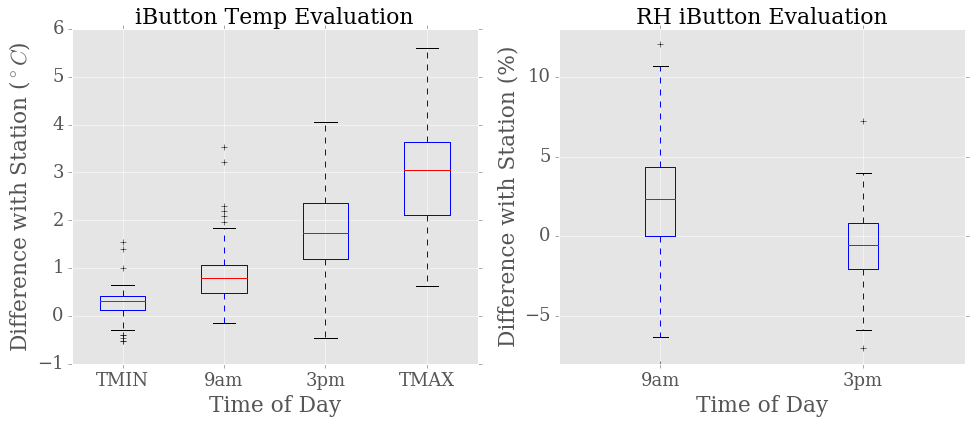

In [52]:
# temp RH evaluation plots
error_6z = tempDF[10][tempDF.index.hour==9].resample('D').mean().subtract(obs['Tn 0600z'])
error_12z = tempDF[10][tempDF.index.hour==15].resample('D').mean().subtract(obs['Tn 1200z'])
min_error = (tempDF[10].resample('D').min().subtract(obs['TMIN']))
max_error = (tempDF[10].resample('D').max().subtract(obs['TMAX']))

print('Min error : ', min_error.mean())
print('Max error : ', max_error.mean())
print('9 am error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm error : ', error_12z[~np.isnan(error_12z)].mean())

error_6z = rhDF[10][rhDF.index.hour==9].resample('D').mean().subtract(obs['RH %0600Z'])
error_12z = rhDF[10][rhDF.index.hour==15].resample('D').mean().subtract(obs['RH% 1200Z'])
print('9 am RH error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm RH error : ', error_12z[~np.isnan(error_12z)].mean())

print('9 am RH error std. dev.  : ',error_6z[~np.isnan(error_6z)].std() )
print('15 pm RH error std. dev. : ', error_12z[~np.isnan(error_12z)].std())

# Measurement validation 
def pbias(sim, obs): 
    return 100*(sim-obs).sum()/(obs).sum()

def moia(sim, obs, j =2): 
    return 1 - (((obs-sim)**j).sum())/( (abs(sim-obs.mean())+abs(obs-obs.mean()))**j).sum() 
# 9am local percent bias 
error9 = pbias(tempDF[startdate:enddate][10][tempDF[startdate:enddate].index.hour==9].resample('D').mean(),obs['Tn 0600z'] )
# 3pm local percent bias
error3 = pbias(tempDF[10][startdate:enddate][tempDF[startdate:enddate].index.hour==15].resample('D').mean(), obs['Tn 1200z'])
# Tmin bias 
errormin = pbias(tempDF[10][startdate:enddate].resample('D').min(),obs['TMIN'])
# Tmax bias 
errormax = pbias(tempDF[10][startdate:enddate].resample('D').max(),obs['TMAX'])
# humidity 
errorrh9 = pbias(rhDF[startdate:enddate][10][rhDF[startdate:enddate].index.hour==9][startdate:enddate].resample('D').mean(),(obs['RH %0600Z']))
errorrh3 = pbias(rhDF[startdate:enddate][10][rhDF[startdate:enddate].index.hour==15][startdate:enddate].resample('D').mean(),obs['RH% 1200Z'])

print('PBIAS = ', error9, error3, errormin, errormax, errorrh9, errorrh3)

# 9am local modified index of agreement (moia) 
error9 = moia(tempDF[10][tempDF.index.hour==9].resample('D').mean(),obs['Tn 0600z'] )
# 3pm local percent moia
error3 = moia(tempDF[10][tempDF.index.hour==15].resample('D').mean(), obs['Tn 1200z'])
# Tmin moia 
errormin = moia(tempDF[10].resample('D').min()[startdate:enddate],obs['TMIN'])
# Tmax moia 
errormax = moia(tempDF[10].resample('D').max()[startdate:enddate],obs['TMAX'])
# humidity 
errorrh9 = moia(rhDF[10][rhDF.index.hour==9][startdate:enddate].resample('D').mean(),(obs['RH %0600Z']))
errorrh3 = moia(rhDF[10][rhDF.index.hour==15][startdate:enddate].resample('D').mean(),obs['RH% 1200Z'])

print('moia = ', error9, error3, errormin, errormax, errorrh9, errorrh3)

# restrict the analysis to days when tmax is available
max_error = (tempDF[10].resample('D').max().subtract(obs['TMAX']))
error_12z = tempDF[10][tempDF.index.hour==15].resample('D').mean().subtract(obs['Tn 1200z'])

# make the figure
# Figure 2 
# Measurement validation 
error_6z = tempDF[10][startdate:enddate][tempDF[startdate:enddate].index.hour==9].resample('D').mean().subtract(obs['Tn 0600z'])
error_12z = tempDF[10][startdate:enddate][tempDF[startdate:enddate].index.hour==15].resample('D').mean().subtract(obs['Tn 1200z'])
min_error = (tempDF[10][startdate:enddate].resample('D').min().subtract(obs['TMIN']))
max_error = (tempDF[10][startdate:enddate].resample('D').max().subtract(obs['TMAX']))

fig = plt.figure(figsize = [16,6])
ax = fig.add_subplot(121)
handle =plt.boxplot([min_error[~np.isnan(min_error)],
                    error_6z[~np.isnan(error_6z)],
                     error_12z[~np.isnan(error_12z)], 
                    max_error[~np.isnan(max_error)]],
            positions = [1,2,3,4])
ax.set_xticklabels(['TMIN','9am', '3pm', 'TMAX'])
plt.xlabel('Time of Day')
plt.ylabel('Difference with Station ($^\circ C$)')
plt.ylim([-1,6])
plt.title('iButton Temp Evaluation')
#plt.savefig('plots/tempevaluation.pdf')

error_6z = rhDF[startdate:enddate][10][rhDF[startdate:enddate].index.hour==9].resample('D').mean().subtract(obs['RH %0600Z'])
error_12z = rhDF[startdate:enddate][10][rhDF[startdate:enddate].index.hour==15].resample('D').mean().subtract(obs['RH% 1200Z'])

# plt.figure()
# ax = plt.axes()
ax = fig.add_subplot(122)

handle =plt.boxplot([error_6z[~np.isnan(error_6z)],
                     error_12z[~np.isnan(error_12z)]], 
            positions = [1, 2])
ax.set_xticklabels(['9am','3pm'])
plt.ylim([-8,13])
plt.xlabel('Time of Day')
plt.ylabel('Difference with Station (%)')
plt.title('RH iButton Evaluation')
plt.savefig('plots/tempRHevaluation.eps')


##### reported statistics
# temp
error_6z = tempDF[startdate:enddate][10][tempDF[startdate:enddate].index.hour==9].resample('D').mean().subtract(obs['Tn 0600z'])
error_12z = tempDF[10][startdate:enddate][tempDF[startdate:enddate].index.hour==15].resample('D').mean().subtract(obs['Tn 1200z'])
min_error = (tempDF[10][startdate:enddate].resample('D').min().subtract(obs['TMIN']))
max_error = (tempDF[10][startdate:enddate].resample('D').max().subtract(obs['TMAX']))

print('Min error : ', min_error.mean())
print('Max error : ', max_error.mean())
print('9 am error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm error : ', error_12z[~np.isnan(error_12z)].mean())

# RH
error_6z = rhDF[startdate:enddate][10][rhDF[startdate:enddate].index.hour==9].resample('D').mean().subtract(obs['RH %0600Z'])
error_12z = rhDF[startdate:enddate][10][rhDF[startdate:enddate].index.hour==15].resample('D').mean().subtract(obs['RH% 1200Z'])
print('9 am RH error : ',error_6z[~np.isnan(error_6z)].mean() )
print('15 pm RH error : ', error_12z[~np.isnan(error_12z)].mean())

print('9 am RH error std. dev.  : ',error_6z[~np.isnan(error_6z)].std() )
print('15 pm RH error std. dev. : ', error_12z[~np.isnan(error_12z)].std())tempRHevaluation

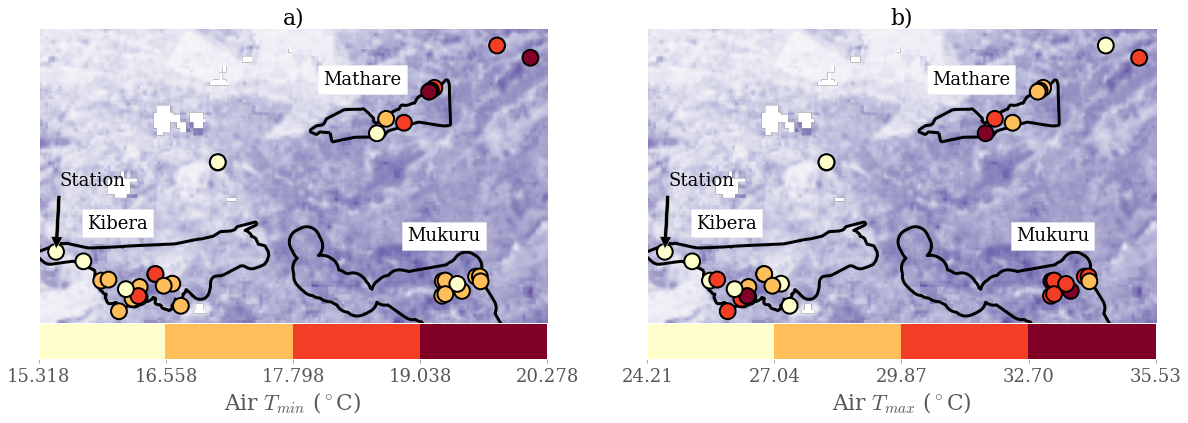

In [108]:
# Figure Plot mean temperature maps
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import gdal
# read in geotiff file
ds = gdal.Open('data/masked_Nairobi_lst.tif')
lst = gdal.Open('data/masked_Nairobi_lst.tif').ReadAsArray()
lst[lst==0] = np.nan
gt = ds.GetGeoTransform()
proj = ds.GetProjection()
extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

fig = plt.figure(figsize=[20,10])
ax = plt.subplot(1,2,1,projection = ccrs.PlateCarree())

# display image
img = ax.imshow(lst, extent=extent, origin='upper', cmap = plt.cm.Purples, vmin = np.nanmin(lst), zorder =0)

# display shapefiles
# add shapefiles
for sfile in glob.glob('data/MergedSlumShapefiles/*.shp'): 
    for shp in shpreader.Reader(sfile).geometries():
        # pick a default color for the land with a black outline,
        # this will change if the storm intersects with our track
        facecolor = 'None'#[0.9375, 0.9375, 0.859375]
        edgecolor = 'black'
        ax.add_geometries([shp], ccrs.PlateCarree(), edgecolor='k', facecolor = 'None', linewidth = 3, zorder =1)
x = meta['location:Longitude']#+ (np.random.random_sample(x.shape[0])-.5)*.01
y = meta['location:Latitude'] 
# define a colorbar 
c = tempDF[startdate:enddate].resample('D').min().mean()
cmap = matplotlib.cm.YlOrRd
bounds = np.linspace(np.nanmin(c.values),np.nanmax(c.values),5)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# plot data
plotHandle = ax.scatter(x = x, y= y, c = c.values, 
           transform = ccrs.Geodetic(), s = 250,
                        cmap = cmap, norm = norm, 
                        edgecolors = 'black', linewidth = 2, zorder = 2)

# make plot pretty 
# zoom in plot
b= -0.005 # offset by b
obs_lims = (meta['location:Longitude'].min()+b, meta['location:Longitude'].max()-b, 
              meta['location:Latitude'].min()+b, meta['location:Latitude'].max()-b)
ax.set_extent(obs_lims)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.text(meta.loc[Kibera]['location:Longitude'].max()-0.01,
        meta.loc[Kibera]['location:Latitude'].max()+0.01,
        'Kibera', transform = ccrs.Geodetic(), horizontalalignment = 'right', 
       bbox={'facecolor':'white', 'alpha':1.0, 'pad':5})

ax.text(meta.loc[MathareCleaned]['location:Longitude'].max()-0.01,
        meta.loc[MathareCleaned]['location:Latitude'].max()+0.001,
        'Mathare', transform = ccrs.Geodetic(), horizontalalignment = 'right', 
       bbox={'facecolor':'white', 'alpha':1.0, 'pad':5})
ax.text(meta.loc[Mukuru]['location:Longitude'].max(),
        meta.loc[Mukuru]['location:Latitude'].max()+0.015,
        'Mukuru', transform = ccrs.Geodetic(), 
       bbox={'facecolor':'white', 'alpha':1.0, 'pad':5}, 
        horizontalalignment='right',
       verticalalignment='top')
ax.annotate('Station', xy=(meta.loc[10]['location:Longitude'], meta.loc[10]['location:Latitude']),
            xytext= (meta.loc[10]['location:Longitude']+0.001,
                     meta.loc[10]['location:Latitude']+0.02), #(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
cbaxes = fig.add_axes([0.1245, 0.261, 0.353, 0.05]) 
cb = plt.colorbar(plotHandle, orientation = 'horizontal', cax = cbaxes)
cb.set_label('Air $T_{min}$ ($^\circ $C)')
ax.set_title('a)')

# plot Max daily temp 
ax2 = plt.subplot(1,2,2,projection = ccrs.PlateCarree())
# display image
img = ax2.imshow(lst, extent=extent, origin='upper', cmap = plt.cm.Purples, vmin = np.nanmin(lst), zorder =0)

# display shapefiles
# add shapefiles
for sfile in glob.glob('data/MergedSlumShapefiles/*.shp'): 
    for shp in shpreader.Reader(sfile).geometries():
        # pick a default color for the land with a black outline,
        # this will change if the storm intersects with our track
        facecolor = 'None'#[0.9375, 0.9375, 0.859375]
        edgecolor = 'black'
        ax2.add_geometries([shp], ccrs.PlateCarree(), edgecolor='k', facecolor = 'None', linewidth = 3, zorder =1)

x = meta['location:Longitude']#+ (np.random.random_sample(x.shape[0])-.5)*.01
y = meta['location:Latitude'] 
# define a colorbar 
c = tempDF[startdate:enddate].resample('D').max().mean()
cmap = matplotlib.cm.YlOrRd
bounds = np.linspace(np.nanmin(c.values),np.nanmax(c.values),5)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# plot data
plotHandle = ax2.scatter(x = x, y= y, c = c.values, 
           transform = ccrs.Geodetic(), s = 250,
                        cmap = cmap, norm = norm, 
                        edgecolors = 'black', linewidth = 2, zorder = 2)

# make plot pretty 
# zoom in plot
b= -0.005 # offset by b
obs_lims = (meta['location:Longitude'].min()+b, meta['location:Longitude'].max()-b, 
              meta['location:Latitude'].min()+b, meta['location:Latitude'].max()-b)
ax2.set_extent(obs_lims)

ax2.background_patch.set_visible(False)
ax2.outline_patch.set_visible(False)

ax2.text(meta.loc[Kibera]['location:Longitude'].max()-0.01,
        meta.loc[Kibera]['location:Latitude'].max()+0.01,
        'Kibera', transform = ccrs.Geodetic(), horizontalalignment = 'right', 
       bbox={'facecolor':'white', 'alpha':1.0, 'pad':5})

ax2.text(meta.loc[MathareCleaned]['location:Longitude'].max()-0.01,
        meta.loc[MathareCleaned]['location:Latitude'].max()+0.001,
        'Mathare', transform = ccrs.Geodetic(), horizontalalignment = 'right', 
       bbox={'facecolor':'white', 'alpha':1.0, 'pad':5})
ax2.text(meta.loc[Mukuru]['location:Longitude'].max(),
        meta.loc[Mukuru]['location:Latitude'].max()+0.015,
        'Mukuru', transform = ccrs.Geodetic(), 
       bbox={'facecolor':'white', 'alpha':1.0, 'pad':5}, 
        horizontalalignment='right',
       verticalalignment='top')

ax2.annotate('Station', xy=(meta.loc[10]['location:Longitude'], meta.loc[10]['location:Latitude']),
            xytext= (meta.loc[10]['location:Longitude']+0.001,
                     meta.loc[10]['location:Latitude']+0.02), #(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
cbaxes = fig.add_axes([0.547, 0.261, 0.353, 0.05]) 
cb = plt.colorbar(plotHandle, orientation = 'horizontal', cax = cbaxes)
cb.set_label('Air $T_{max}$ ($^\circ $C)')
ax2.set_title('b)')
plt.savefig('plots/NairobiMean.eps', bbox_inches = 'tight')


/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/Users/annascott2/anaconda2/lib/python2.7/site-pa

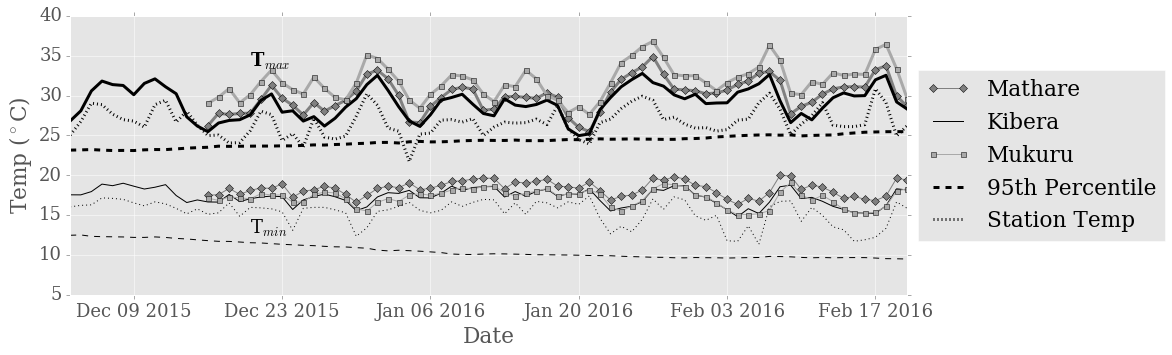

In [235]:
# timeseries plot 
# first, import the data and compute climatologies 

# compute climatologies
dagoretti = pd.read_csv('data/Dagoretti_UHI_1967-2015.csv')
dagoretti = dagoretti.set_index(pd.to_datetime(['%s-%s-%s'%(y,m,d) for (y,m,d) in zip(dagoretti['YEAR'].values, dagoretti['MONTH'].values, dagoretti['DATE'].values)]))['1984-01-01':'2014-12-31']
# clean data 
dagoretti['MEAN'][dagoretti['MEAN'] < 0] = np.nan
dagoretti['MEAN'][dagoretti['MEAN'] > 50] = np.nan
dagoretti['MAX'][dagoretti['MAX'] > 50] = np.nan
dagoretti['MAX'][dagoretti['MAX'] < 5] = np.nan


dag_95_max = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_95_min = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_95_mean = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_75_mean = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan

i = 0
for day in np.unique(dagoretti.index.dayofyear): 
    # compute 95th percentile for tmax, excluding nans
    data = dagoretti['MAX'][dagoretti.index.dayofyear==day]
    dag_95_max[i] = np.percentile(data[~np.isnan(data)], [.95])
    # compute 95th percentile for tmin, excluding nans
    data = dagoretti['MIN'][dagoretti.index.dayofyear==day]    
    dag_95_min[i] = np.percentile(data[~np.isnan(data)], [.95])
    # compute 95th percentile for tmean, excluding nans
    data = dagoretti['MEAN'][dagoretti.index.dayofyear==day]    
    dag_95_mean[i] = np.percentile(data[~np.isnan(data)], [.95])
    dag_75_mean[i] = np.percentile(data[~np.isnan(data)], [.75])
    i = i+1
    
smoothed_dag_95_max = pd.rolling_mean(np.concatenate([dag_95_max, dag_95_max]), 30)[366:]
smoothed_dag_95_min = pd.rolling_mean(np.concatenate([dag_95_min, dag_95_min]), 30)[366:]
smoothed_dag_95_mean = pd.rolling_mean(np.concatenate([dag_95_mean, dag_95_mean]), 30)[366:]
smoothed_dag_75_mean = pd.rolling_mean(np.concatenate([dag_75_mean, dag_75_mean]), 30)[366:]

# plot timeseries
fig = plt.figure(figsize = [15, 5])
plt.hold(True)
#color_wheel = ['black', '#d7301f', '#fc8d59']
MathareColor ='gray' #'#d7191c'# '#e41a1c'#'#66c2a5'
MukuruColor = 'darkgray'#'#fdae61'#'#ff7f00'#'#fc8d62'
KiberaColor = 'k'#'#abdda4'#'#4daf4a'#'#8da0cb'
OtherColor = 'lightgray'#'#984ea3'#'#33a02c'
StationColor = '#abdda4'
color_wheel = [MathareColor, KiberaColor, MukuruColor]
minlw = 1# minimum temp linewidth
maxlw = 3 #maximum temp linewidth
symbols = ['D', '', 's']
for neighborhood, labels, color, symbol in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel, symbols):
    plt.plot(tempDF[startdate:enddate].resample('D').min().index,
             tempDF[startdate:enddate].resample('D').min()[neighborhood].mean(axis=1), 
            label = labels, alpha =1,marker = symbol, markersize = 5,linewidth = minlw, color= color)
    
    plt.plot(tempDF[startdate:enddate].resample('D').max().index,
             tempDF[startdate:enddate].resample('D').max()[neighborhood].mean(axis=1), 
            label = labels, alpha = 1, marker = symbol,markersize = 5, linewidth = maxlw, color= color)

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         3.2+ smoothed_dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', linewidth = maxlw, label = '95th Percentile')
plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         0.16+ smoothed_dag_95_min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', linewidth = minlw, label = '95th Percentile')
         
plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
        tempDF[startdate:enddate][10].resample('D').max(),
        ':', label = 'Station Temp', color = 'k', linewidth = maxlw)

plt.plot(tempDF[startdate:enddate].resample('D').min().index, 
        tempDF[startdate:enddate][10].resample('D').min(),
        ':', 
         label = 'Station Temp', color = 'k', linewidth = minlw)
    
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Nairobi Daily Temperatures') # Adjusted 95th percentile
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

plt.text('2015-12-20', 33, 'T$_{max}$', weight = 'bold', horizontalalignment='left', verticalalignment='bottom')
plt.text('2015-12-20', 12, 'T$_{min}$', weight = 'light', horizontalalignment='left', verticalalignment='bottom')
plt.savefig('plots/timeseries.eps', bbox_inches='tight')

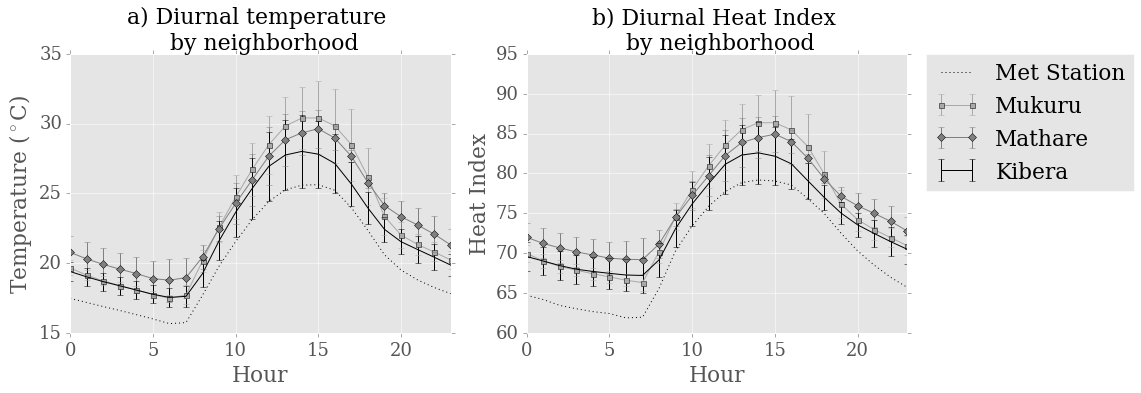

In [69]:
# How does temperature differ within informal settlements?
# mean temperature over the course of a day
# error bars represent standard deviation of sensor-to-sensor variability within the neighborhood
fig = plt.figure(figsize = [15,5])
symbols = ['o', '<', 's']

neighborhoods = Mukuru+ Kibera + Mathare
ax = fig.add_subplot(121)
tempDF[10].groupby(tempDF.index.hour).mean().plot(style = ':k')
tempDF[Mukuru].groupby(tempDF.index.hour).mean().mean(axis=1).plot(color = MukuruColor, marker = 's', markersize =5, yerr = tempDF[Mukuru].groupby(tempDF.index.hour).mean().std(axis=1))
tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1).plot(color = MathareColor,marker = 'D', markersize = 5, yerr = tempDF[Mathare].groupby(tempDF.index.hour).mean().std(axis=1))
tempDF[Kibera].groupby(tempDF.index.hour).mean().mean(axis=1).plot(color = KiberaColor, yerr = tempDF[Kibera].groupby(tempDF.index.hour).mean().std(axis=1), )
#tempDF[Chiromo].groupby(tempDF.index.hour).mean().mean(axis=1).plot(yerr = tempDF[Chiromo].groupby(tempDF.index.hour).mean().std(axis=1))

#plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('a) Diurnal temperature \n by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Temperature ($^\circ$C)')

#plt.figure(figsize = [8,5])
ax2 = fig.add_subplot(122)

hi[10].groupby(hi.index.hour).mean().plot(style = ':k')
hi[Mukuru].groupby(hi.index.hour).mean().mean(axis=1).plot(color = MukuruColor,marker = 's', markersize = 5,yerr  = hi[Mukuru].groupby(hi.index.hour).mean().std(axis=1))
hi[Mathare].groupby(hi.index.hour).mean().mean(axis=1).plot(color = MathareColor, marker = 'D', markersize = 5, yerr= hi[Mathare].groupby(hi.index.hour).mean().std(axis=1))
hi[Kibera].groupby(hi.index.hour).mean().mean(axis=1).plot(color = KiberaColor, yerr  = hi[Kibera].groupby(hi.index.hour).mean().std(axis=1) )
#hi[Chiromo].groupby(hi.index.hour).mean().mean(axis=1).plot(yerr = hi[Chiromo].groupby(hi.index.hour).mean().std(axis=1))
#plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera', 'Chiromo Campus'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.legend(['Met Station', 'Mukuru','Mathare', 'Kibera'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('b) Diurnal Heat Index \n by neighborhood')
plt.xlabel('Hour')
plt.ylabel('Heat Index')
fig.patch.set_alpha(0)

plt.savefig('plots/diurnal.eps', bbox_inches='tight')

In [228]:
tempDF[Mukuru].groupby(tempDF.index.hour).mean().mean(axis=1)[15]-tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1)[15]


0.77749744211716632

In [229]:
0.03*4.5

0.135

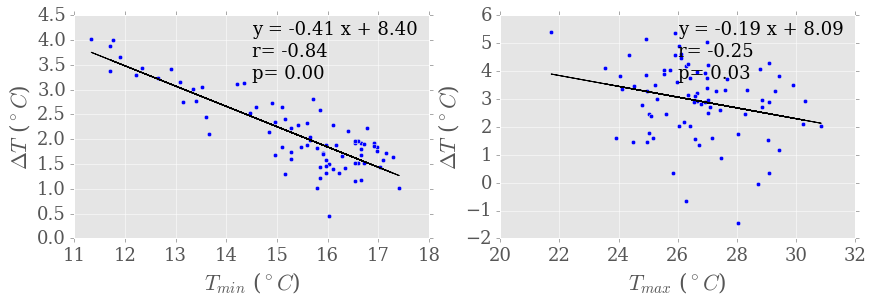

In [306]:
# plot temperature versus DT
fig = plt.figure(figsize=[14,4])
ax = plt.subplot(1,2,1)

diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').min().subtract(tempDF[10][startdate:enddate].resample('D').min().values
,  axis=0)
easy_scatter(tempDF[10][startdate:enddate].resample('D').min(),
             diff[startdate:enddate].mean(axis=1),
                 '', '$T_{min}$ ($ ^ \circ C$)','$\Delta T$ ($^\circ C$)')

ax = plt.subplot(1,2,2)
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').max().subtract(tempDF[10][startdate:enddate].resample('D').max().values
,  axis=0)
easy_scatter(tempDF[10][startdate:enddate].resample('D').max(),
             diff[startdate:enddate].mean(axis=1),
                 '', '$T_{max}$ ($^\circ C$)','$\Delta T$ ($^\circ C$)')

plt.savefig('plots/tvsdt.eps', bbox_inches = 'tight')

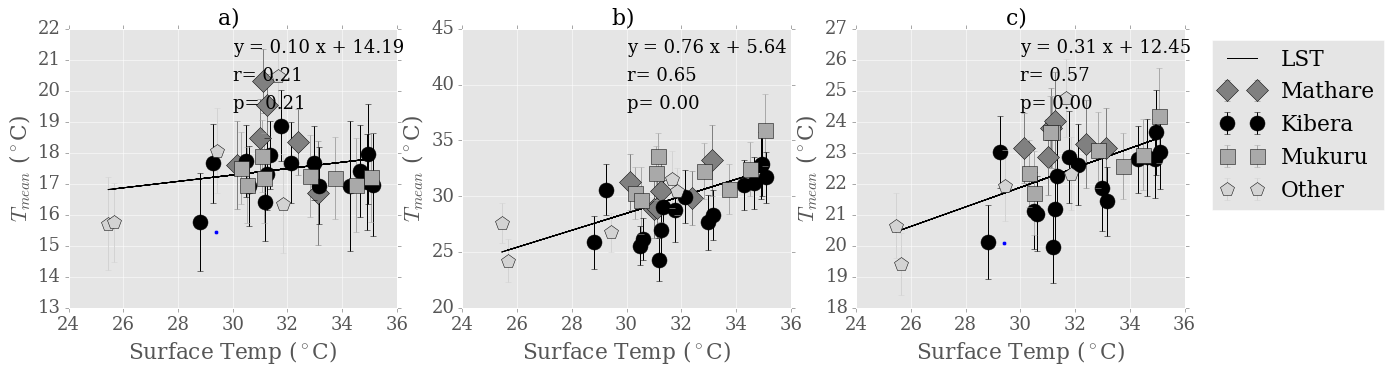

In [299]:
# plot relationship with LST
# plot LST
#first, calculate surface properties. These are now saved out as SurfacePropertiesNairobi.csv
# sys.path.append('../Bmore/')
# import spatialfunctions
# lon = meta['location:Longitude'].values
# lat = meta['location:Latitude'].values

# # mount 
# rasterfile = '/Users/annascott2/mountpoint/cityheat/Nairobi/data/LC81680612015053LGN00_B10.TIF'#'../satellite/data/atm_cor_10_LC80150332015229.tif'
# #rasterfile = 'data/LC81680612015053LGN00_B10.TIF'#'../satellite/data/atm_cor_10_LC80150332015229.tif'
# band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
# LST = spatialfunctions.band10_toLST(band10)

# #path = '../../satellite/data/BaltimoreLandsatSummer2015/L8 OLI_TIRS/LC80150332015229LGN00/'
# path = '/Users/annascott2/mountpoint/cityheat/satellite/data/Nairobi/L8OLI_TIRS/LC81680612015053LGN00/'
# B = np.zeros((5,lon.shape[0]))
# for i in (1,2,3,4,5): 
#     file = path+ 'LC81680612015053LGN00_B'+'%s'%i +'.TIF'
#     DN = spatialfunctions.extract_raster_values(lon,lat,file)
#     # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
#     reflectance_mult_band = 2.000e-5
#     reflectance_add_band  = -0.100000
#     B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

# alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
# alb[alb>1] = 'NaN'
# alb[alb<0] = 'NaN'

# NDVI = (B[4,:]-B[3,:]) / (B[4,:]+B[3,:])

# rasterfile = '/Users/annascott2/mountpoint/cityheat/Nairobi/data/s02_e036_1arc_v3.tif'
# #rasterfile = 'data/s02_e036_1arc_v3.tif'

# elevation = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# df = pd.DataFrame({"MaxDailyTemp": tempDF.resample('D').max().mean(),
#                    'MinDailyTemp': tempDF.resample('D').min().mean(), 
#                    'MeanDailyTemp': tempDF.resample('D').mean().mean(), # tempDF.resample('D').min(),
#                    "Elevation": elevation, 
#                    "LST": LST, 
#                     "NDVI": NDVI,
#                    "albedo": alb, 
#                     }).set_index(tempDF.columns)
# df.to_csv('SurfacePropertiesNairobi.csv')

df = pd.read_csv('data/SurfacePropertiesNairobi2015005.csv').set_index(u'Unnamed: 0')
fig = plt.figure(figsize = [20,5])
import string
units = {'Elevation': 'Elevation (Meters)', 'LST': 'Surface Temp ($^\circ$C)', 'NDVI': 'NDVI', 'albedo': '%'}
minmaxmean = 'mean'
otherSensors = [18, 27, 34, 41, 42]
msize = 15

i = 1
temp = tempDF.resample('D').mean()
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
for temp, minmaxmean in zip([tempDF.resample('D').min(), tempDF.resample('D').max(), tempDF.resample('D').mean()], ['min', 'max','mean']) :
    for surface_property in ['LST'] :
        ax = plt.subplot(1,3,i)
        easy_scatter( df[surface_property], temp.mean(), string.ascii_lowercase[i-1] + ') ',#+ '%s versus $T_{%s}$'%(surface_property,minmaxmean),  
                     units[surface_property], '$T_{mean}$ ($^\circ$C)')
        ax.errorbar( df[surface_property][MathareCleaned], temp[MathareCleaned].mean(), fmt='D', 
                    yerr =  temp[MathareCleaned].std().values,
                    color = MathareColor, markersize=msize, label = 'Mathare')
        ax.errorbar( df[surface_property][Kibera], temp[Kibera].mean(),fmt='o', 
                    yerr =  temp[Kibera].std().values, 
                    color = KiberaColor,  markersize=msize, label = 'Kibera')
        ax.errorbar( df[surface_property][Mukuru], temp[Mukuru].mean(), fmt='s', 
                   yerr = temp[Mukuru].std().values,
                color = MukuruColor,  markersize=msize, label = 'Mukuru')
        ax.errorbar( df[surface_property][otherSensors], temp[otherSensors].mean(), fmt='p', 
                   yerr = temp[otherSensors].std().values,
                color = OtherColor,  markersize=msize, label = 'Other')
        #prettify_plot()
        i = i+1    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,)
fig.patch.set_alpha(0)
plt.savefig('plots/LST.eps', bbox_inches = 'tight')

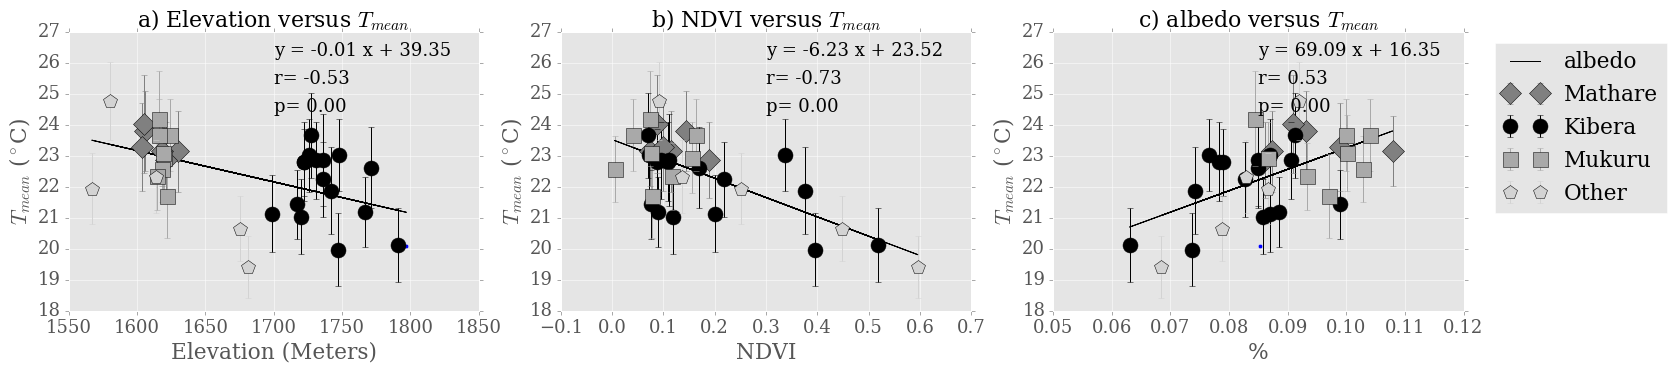

In [77]:
# plot relationship with surface properties
otherSensors = [18, 27, 34, 41, 42]
fig = plt.figure(figsize=[25,5])

MathareColor ='gray' #'#d7191c'# '#e41a1c'#'#66c2a5'
MukuruColor = 'darkgray'#'#fdae61'#'#ff7f00'#'#fc8d62'
KiberaColor = 'k'#'#abdda4'#'#4daf4a'#'#8da0cb'
OtherColor = 'lightgray'#'#984ea3'#'#33a02c'
StationColor = '#abdda4'
msize = 15
i = 1
markers = ['D', 'o', 's', 'p', '']
#for temp, minmaxmean in zip(tempDF.resample('D').mean(), 'mean') :
temp = tempDF.resample('D').mean()
minmaxmean = 'mean'
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
for surface_property in ['Elevation', 'NDVI', 'albedo'] :
    ax = plt.subplot(1,3,i)
    easy_scatter( df[surface_property], temp.mean(), string.ascii_lowercase[i-1] + ') '+ '%s versus $T_{%s}$'%(surface_property,minmaxmean),  
                 units[surface_property], '$T_{mean}$ ($^\circ$C)')
    ax.errorbar( df[surface_property][MathareCleaned], temp[MathareCleaned].mean(), fmt='D', 
                yerr =  temp[MathareCleaned].std().values,
                color = MathareColor, markersize=msize, label = 'Mathare')
    ax.errorbar( df[surface_property][Kibera], temp[Kibera].mean(),fmt='o', 
                yerr =  temp[Kibera].std().values, 
                color = KiberaColor,  markersize=msize, label = 'Kibera')
    ax.errorbar( df[surface_property][Mukuru], temp[Mukuru].mean(), fmt='s', 
               yerr = temp[Mukuru].std().values,
            color = MukuruColor,  markersize=msize, label = 'Mukuru')
    ax.errorbar( df[surface_property][otherSensors], temp[otherSensors].mean(), fmt='p', 
               yerr = temp[otherSensors].std().values,
            color = OtherColor,  markersize=msize, label = 'Other')
    #prettify_plot()
    i = i+1
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,)
fig.patch.set_alpha(0)

plt.savefig('plots/surfacepropertiesTmean.eps', bbox_inches='tight')

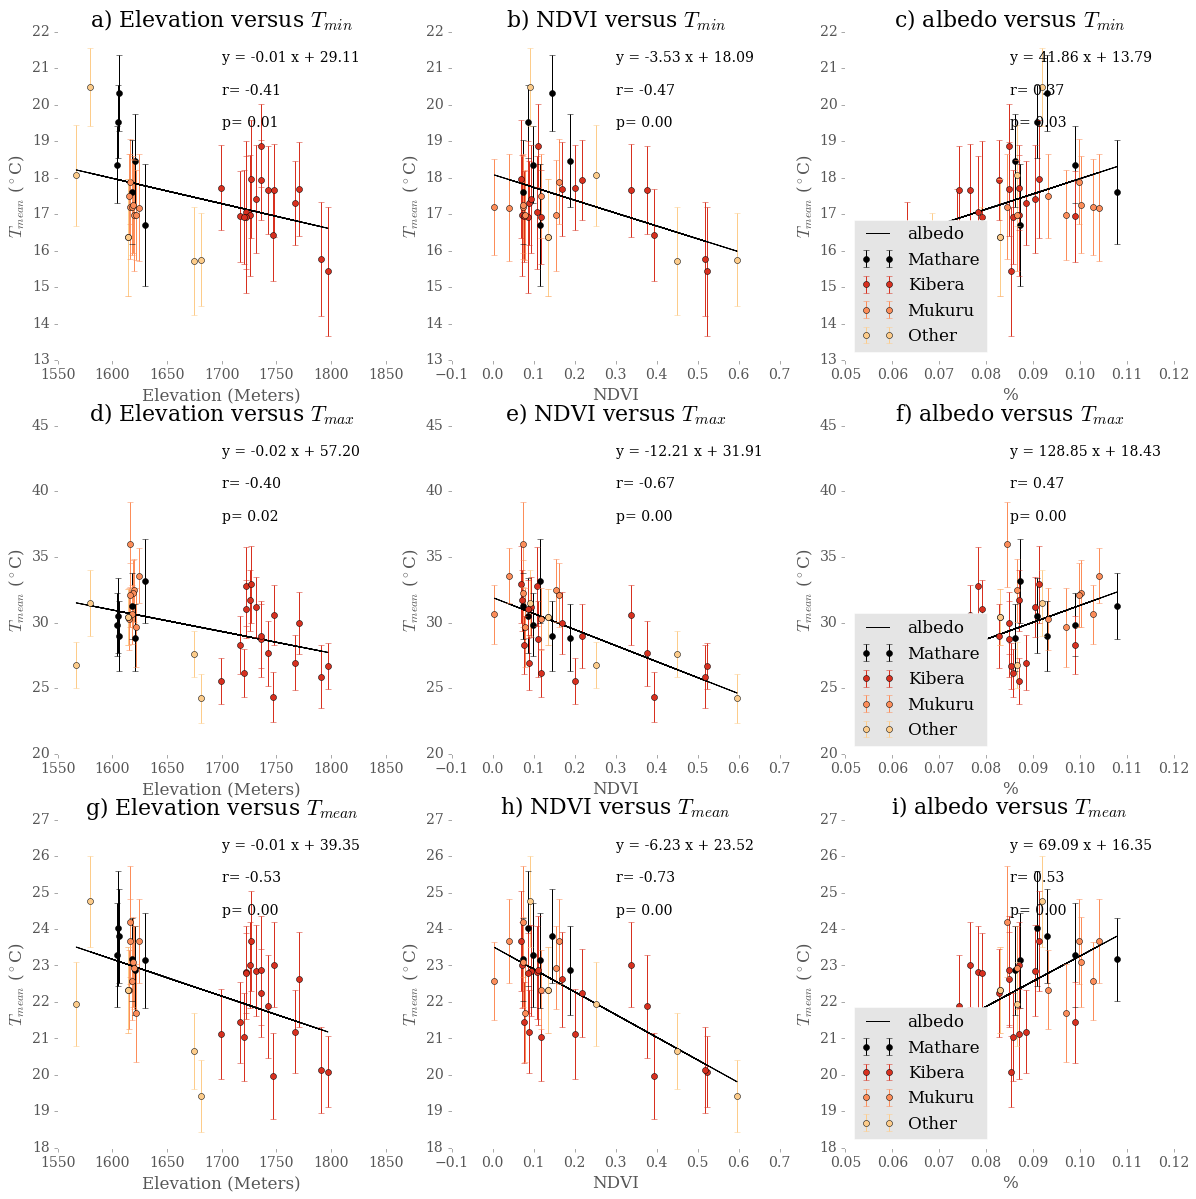

In [74]:
# 34,42- sort of near Mathare, 
otherSensors = [18, 27, 34, 41, 42]
fig = plt.figure(figsize=[20,20])
i = 1
for temp, minmaxmean in zip([tempDF.resample('D').min(), tempDF.resample('D').max(), tempDF.resample('D').mean()], ['min', 'max','mean']) :
#, minmaxmean in zip([tempDF.min(), tempDF.max(), tempDF.mean()], ['min', 'max','mean']) :
    for surface_property in ['Elevation', 'NDVI', 'albedo'] :
        ax = plt.subplot(3,3,i)
        easy_scatter( df[surface_property], temp.mean(), string.ascii_lowercase[i-1] + ') '+ '%s versus $T_{%s}$'%(surface_property,minmaxmean),  
                     units[surface_property], '$T_{mean}$ ($^\circ$C)')
        ax.errorbar( df[surface_property][MathareCleaned], temp[MathareCleaned].mean(), fmt='o', 
                    yerr =  temp[MathareCleaned].std().values,
                    color = 'black', label = 'Mathare')
        ax.errorbar( df[surface_property][Kibera], temp[Kibera].mean(),fmt='o', 
                    yerr =  temp[Kibera].std().values, 
                    color = '#d7301f', label = 'Kibera')
        ax.errorbar( df[surface_property][Mukuru], temp[Mukuru].mean(), fmt='o', 
                   yerr = temp[Mukuru].std().values,
                color = '#fc8d59', label = 'Mukuru')
        ax.errorbar( df[surface_property][otherSensors], temp[otherSensors].mean(), fmt='o', 
                   yerr = temp[otherSensors].std().values,
                color = '#fdcc8a', label = 'Other')
        prettify_plot()
        i = i+1
    plt.legend(loc = 3)

In [323]:
print('Mukuru elevation and NDVI :',df['Elevation'][Mukuru].mean(), df['NDVI'][Mukuru].mean())
print('Mathare elevation and NDVI :',df['Elevation'][MathareCleaned].median(), df['NDVI'][MathareCleaned].mean())
print('Kibera elevation and NDVI :',df['Elevation'][Kibera].mean(), df['NDVI'][Kibera].mean())

('Mukuru elevation and NDVI :', 1618.2222222222222, 0.09372354250718334)
('Mathare elevation and NDVI :', 1612.0, 0.11834875913256666)
('Kibera elevation and NDVI :', 1741.1176470588234, 0.20951394376625296)


In [104]:
np.percentile?

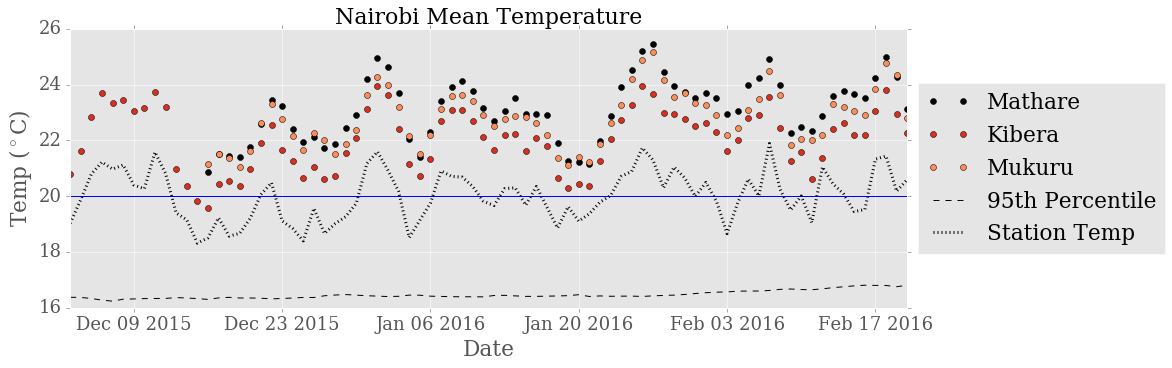

In [112]:
fig = plt.figure(figsize = [15, 5])
plt.hold(True)
color_wheel = ['black', '#d7301f', '#fc8d59']

for neighborhood, labels, color in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel):
    plt.plot(tempDF[startdate:enddate].resample('D').mean().index,
             tempDF[startdate:enddate].resample('D').mean()[neighborhood].mean(axis=1), 'o',
            label = labels, alpha =1, linewidth = 2, color= color)

plt.plot(tempDF[startdate:enddate].resample('D').mean().index, 
         smoothed_dag_95_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', label = '95th Percentile')
         
plt.plot(tempDF[startdate:enddate].resample('D').mean().index, 
        tempDF[startdate:enddate][10].resample('D').mean(),
        ':', label = 'Station Temp', color = 'k', linewidth = 3)

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Nairobi Mean Temperature')
plt.axhline(20)
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

In [117]:
dagoretti['2003-01-01':'2009-01-01']

,YEAR,MONTH,DATE,MAX,MIN,MEAN
2003-01-01,2003,1,1,23.8,14.8,19.30
2003-01-02,2003,1,2,23.8,15.7,19.75
2003-01-03,2003,1,3,24.1,15.6,19.85
2003-01-04,2003,1,4,24.6,15.7,20.15
2003-01-05,2003,1,5,24.5,15.5,20.00
2003-01-06,2003,1,6,21.8,15.9,18.85
2003-01-07,2003,1,7,21.8,12.2,17.00
2003-01-08,2003,1,8,25.2,12.3,18.75
2003-01-09,2003,1,9,25.2,12.3,18.75
2003-01-10,2003,1,10,26.6,14.1,20.35


/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/Users/annascott2/anaconda2/lib/python2.7/site-pa

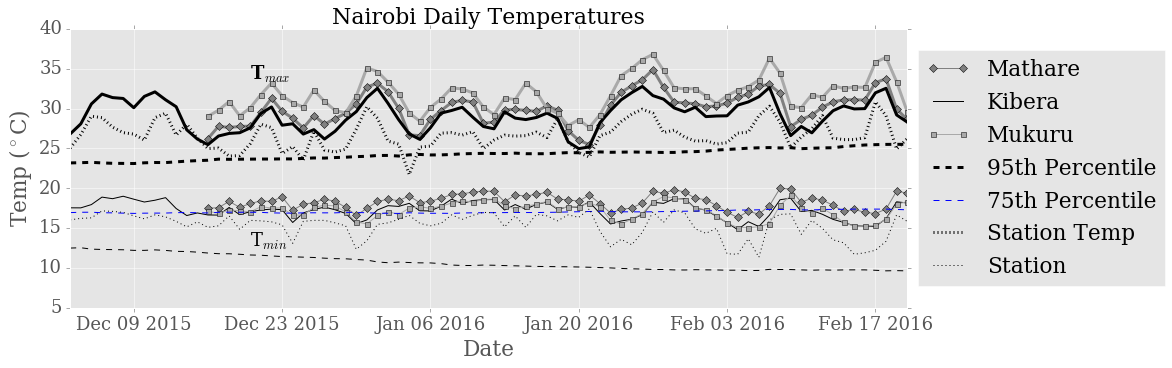

In [203]:
# timeseries plot 
# first, import the data and compute climatologies 

# compute climatologies
dagoretti = pd.read_csv('data/Dagoretti_UHI_1967-2015.csv')
dagoretti = dagoretti.set_index(pd.to_datetime(['%s-%s-%s'%(y,m,d) for (y,m,d) in zip(dagoretti['YEAR'].values, dagoretti['MONTH'].values, dagoretti['DATE'].values)]))['1985-01-01':'2015-10-30']
# clean data 
dagoretti['MEAN'][dagoretti['MEAN'] < 0] = np.nan
dagoretti['MEAN'][dagoretti['MEAN'] > 50] = np.nan
dagoretti['MAX'][dagoretti['MAX'] > 50] = np.nan
dagoretti['MAX'][dagoretti['MAX'] < 5] = np.nan


dag_95_max = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_95_min = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_95_mean = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_75_mean = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan

i = 0
for day in np.unique(dagoretti.index.dayofyear): 
    # compute 95th percentile for tmax, excluding nans
    data = dagoretti['MAX'][dagoretti.index.dayofyear==day]
    dag_95_max[i] = np.percentile(data[~np.isnan(data)], [.95])
    # compute 95th percentile for tmin, excluding nans
    data = dagoretti['MIN'][dagoretti.index.dayofyear==day]    
    dag_95_min[i] = np.percentile(data[~np.isnan(data)], [.95])
    # compute 95th percentile for tmean, excluding nans
    data = dagoretti['MEAN'][dagoretti.index.dayofyear==day]    
    dag_95_mean[i] = np.percentile(data[~np.isnan(data)], [.95])
    dag_75_mean[i] = np.percentile(data[~np.isnan(data)], [.75])
    i = i+1
    
smoothed_dag_95_max = pd.rolling_mean(np.concatenate([dag_95_max, dag_95_max]), 30)[366:]
smoothed_dag_95_min = pd.rolling_mean(np.concatenate([dag_95_min, dag_95_min]), 30)[366:]
smoothed_dag_95_mean = pd.rolling_mean(np.concatenate([dag_95_mean, dag_95_mean]), 30)[366:]
smoothed_dag_75_mean = pd.rolling_mean(np.concatenate([dag_75_mean, dag_75_mean]), 30)[366:]

# plot timeseries
fig = plt.figure(figsize = [15, 5])
plt.hold(True)
#color_wheel = ['black', '#d7301f', '#fc8d59']
MathareColor ='gray' #'#d7191c'# '#e41a1c'#'#66c2a5'
MukuruColor = 'darkgray'#'#fdae61'#'#ff7f00'#'#fc8d62'
KiberaColor = 'k'#'#abdda4'#'#4daf4a'#'#8da0cb'
OtherColor = 'lightgray'#'#984ea3'#'#33a02c'
StationColor = '#abdda4'
color_wheel = [MathareColor, KiberaColor, MukuruColor]
minlw = 1# minimum temp linewidth
maxlw = 3 #maximum temp linewidth
symbols = ['D', '', 's']
for neighborhood, labels, color, symbol in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel, symbols):
    plt.plot(tempDF[startdate:enddate].resample('D').min().index,
             tempDF[startdate:enddate].resample('D').min()[neighborhood].mean(axis=1), 
            label = labels, alpha =1,marker = symbol, markersize = 5,linewidth = minlw, color= color)
    
    plt.plot(tempDF[startdate:enddate].resample('D').max().index,
             tempDF[startdate:enddate].resample('D').max()[neighborhood].mean(axis=1), 
            label = labels, alpha = 1, marker = symbol,markersize = 5, linewidth = maxlw, color= color)

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         3.2+ smoothed_dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', linewidth = maxlw, label = '95th Percentile')
plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         0.16+ smoothed_dag_95_min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', linewidth = minlw, label = '95th Percentile')

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         smoothed_dag_75_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--b', label = '75th Percentile')

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
        tempDF[startdate:enddate][10].resample('D').max(),
        ':', label = 'Station Temp', color = 'k', linewidth = maxlw)

plt.plot(tempDF[startdate:enddate].resample('D').min().index, 
        tempDF[startdate:enddate][10].resample('D').min(),
        ':', 
         label = 'Station', color = 'k', linewidth = minlw)
    
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Nairobi Daily Temperatures') # Adjusted 95th percentile
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

plt.text('2015-12-20', 33, 'T$_{max}$', weight = 'bold', horizontalalignment='left', verticalalignment='bottom')
plt.text('2015-12-20', 12, 'T$_{min}$', weight = 'light', horizontalalignment='left', verticalalignment='bottom')

/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/Users/annascott2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/Users/annascott2/anaconda2/lib/python2.7/site-pa

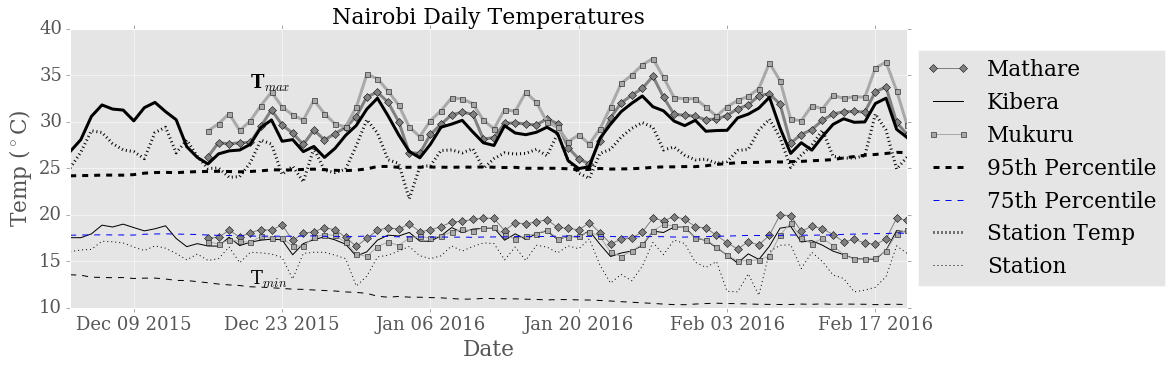

In [201]:
# timeseries plot 
# first, import the data and compute climatologies 

# compute climatologies
dagoretti = pd.read_csv('data/Dagoretti_UHI_1967-2015.csv')
dagoretti = dagoretti.set_index(pd.to_datetime(['%s-%s-%s'%(y,m,d) for (y,m,d) in zip(dagoretti['YEAR'].values, dagoretti['MONTH'].values, dagoretti['DATE'].values)]))['1985-01-01':'2015-10-30']
# clean data 
dagoretti['MEAN'][dagoretti['MEAN'] < 0] = np.nan
dagoretti['MEAN'][dagoretti['MEAN'] > 50] = np.nan
dagoretti['MAX'][dagoretti['MAX'] > 50] = np.nan
dagoretti['MAX'][dagoretti['MAX'] < 5] = np.nan


dag_95_max = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_95_min = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_95_mean = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan
dag_75_mean = np.ones(np.unique(dagoretti.index.dayofyear).shape)*np.nan

i = 0
for day in np.unique(dagoretti.index.dayofyear): 
    # compute 95th percentile for tmax, excluding nans
    data = dagoretti['MAX'][dagoretti.index.dayofyear==day]
    dag_95_max[i] = np.percentile(data[~np.isnan(data)], [.95])
    # compute 95th percentile for tmin, excluding nans
    data = dagoretti['MIN'][dagoretti.index.dayofyear==day]    
    dag_95_min[i] = np.percentile(data[~np.isnan(data)], [.95])
    # compute 95th percentile for tmean, excluding nans
    data = dagoretti['MEAN'][dagoretti.index.dayofyear==day]    
    dag_95_mean[i] = np.percentile(data[~np.isnan(data)], [.95])
    dag_75_mean[i] = np.percentile(data[~np.isnan(data)], [.75])
    i = i+1
    
smoothed_dag_95_max = pd.rolling_mean(np.concatenate([dag_95_max, dag_95_max]), 30)[366:]
smoothed_dag_95_min = pd.rolling_mean(np.concatenate([dag_95_min, dag_95_min]), 30)[366:]
smoothed_dag_95_mean = pd.rolling_mean(np.concatenate([dag_95_mean, dag_95_mean]), 30)[366:]
smoothed_dag_75_mean = pd.rolling_mean(np.concatenate([dag_75_mean, dag_75_mean]), 30)[366:]

# plot timeseries
fig = plt.figure(figsize = [15, 5])
plt.hold(True)
#color_wheel = ['black', '#d7301f', '#fc8d59']
MathareColor ='gray' #'#d7191c'# '#e41a1c'#'#66c2a5'
MukuruColor = 'darkgray'#'#fdae61'#'#ff7f00'#'#fc8d62'
KiberaColor = 'k'#'#abdda4'#'#4daf4a'#'#8da0cb'
OtherColor = 'lightgray'#'#984ea3'#'#33a02c'
StationColor = '#abdda4'
color_wheel = [MathareColor, KiberaColor, MukuruColor]
minlw = 1# minimum temp linewidth
maxlw = 3 #maximum temp linewidth
symbols = ['D', '', 's']
for neighborhood, labels, color, symbol in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel, symbols):
    plt.plot(tempDF[startdate:enddate].resample('D').min().index,
             tempDF[startdate:enddate].resample('D').min()[neighborhood].mean(axis=1), 
            label = labels, alpha =1,marker = symbol, markersize = 5,linewidth = minlw, color= color)
    
    plt.plot(tempDF[startdate:enddate].resample('D').max().index,
             tempDF[startdate:enddate].resample('D').max()[neighborhood].mean(axis=1), 
            label = labels, alpha = 1, marker = symbol,markersize = 5, linewidth = maxlw, color= color)

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         3.2+ smoothed_dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', linewidth = maxlw, label = '95th Percentile')
plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         0.16+ smoothed_dag_95_min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', linewidth = minlw, label = '95th Percentile')

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         smoothed_dag_75_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--b', label = '75th Percentile')

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
        tempDF[startdate:enddate][10].resample('D').max(),
        ':', label = 'Station Temp', color = 'k', linewidth = maxlw)

plt.plot(tempDF[startdate:enddate].resample('D').min().index, 
        tempDF[startdate:enddate][10].resample('D').min(),
        ':', 
         label = 'Station', color = 'k', linewidth = minlw)
    
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Nairobi Daily Temperatures') # Adjusted 95th percentile
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

plt.text('2015-12-20', 33, 'T$_{max}$', weight = 'bold', horizontalalignment='left', verticalalignment='bottom')
plt.text('2015-12-20', 12, 'T$_{min}$', weight = 'light', horizontalalignment='left', verticalalignment='bottom')

In [202]:
startdate

'2015-12-03'

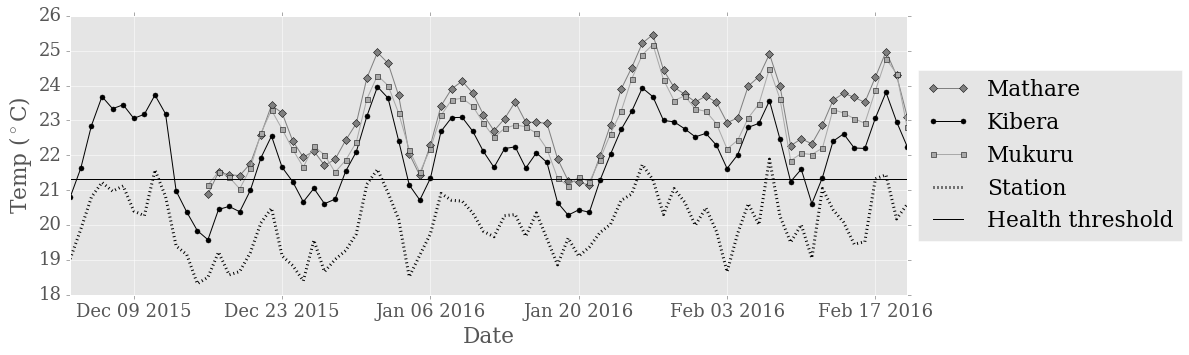

In [199]:
fig = plt.figure(figsize = [15, 5])
plt.hold(True)
#color_wheel = ['black', '#d7301f', '#fc8d59']
color_wheel = [MathareColor, KiberaColor, MukuruColor]
symbols = ['D', 'o', 's']


for neighborhood, labels, color, symbol in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel, symbols):
    plt.plot(tempDF[startdate:enddate].resample('D').mean().index,
             tempDF[startdate:enddate].resample('D').mean()[neighborhood].mean(axis=1), 
            label = labels, alpha =1,marker = symbol, markersize = 5,linewidth = minlw, color= color)

# for neighborhood, labels, color in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel):
#     plt.plot(tempDF[startdate:enddate].resample('D').min().index,
#              tempDF[startdate:enddate].resample('D').mean()[neighborhood].mean(axis=1), 
#             label = labels, alpha =1, linewidth = 2, color= color)

# plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
#          (3.2+0.6)*.5+ smoothed_dag_95_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
#          '--k', label = '95th Percentile')
         
plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
        tempDF[startdate:enddate][10].resample('D').mean(),
        ':', label = 'Station', color = 'k', linewidth = 3)

# plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
#          smoothed_dag_75_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear] + (0.86+1.8)*.5, # account for instruent bias 
#          '--b', label = '75th Percentile')
plt.axhline(20 + (0.86+1.8)*.5, color ='k', label = 'Health threshold')
# plt.axhline(np.percentile(dagoretti['2003-01-01':'2016-01-01'].MEAN.dropna(),95.), color = 'r',
#            label = '95th Thresh., Egondi way')

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Nairobi Mean Temperature')
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')
plt.savefig('plots/meantimeseries.eps', bbox_inches='tight')

In [276]:
df.columns

Index([u'Elevation', u'LST', u'Temp', u'NDVI', u'albedo', u'InPark'], dtype='object')

In [277]:
df[['Temp', 'LST', 'Elevation', 'NDVI', 'InPark', 'albedo']]

,Temp,LST,Elevation,NDVI,InPark,albedo
Unnamed: 0,,,,,,
1,24.200617,35.074893,1616.0,0.073532,0,0.084473
2,22.941949,34.496926,1620.0,0.155459,0,0.086564
3,21.133003,31.268912,1767.0,0.089471,0,0.088476
4,23.285458,32.404932,1604.0,0.099559,0,0.098933
8,22.757178,34.919121,1722.0,0.108473,0,0.078338
9,22.750204,34.287510,1722.0,0.087259,0,0.079039
10,20.024316,29.401782,1797.0,0.522115,1,0.085235
11,22.962275,29.266338,1748.0,0.337181,0,0.076526
12,21.132479,30.504992,1699.0,0.199778,1,0.087026


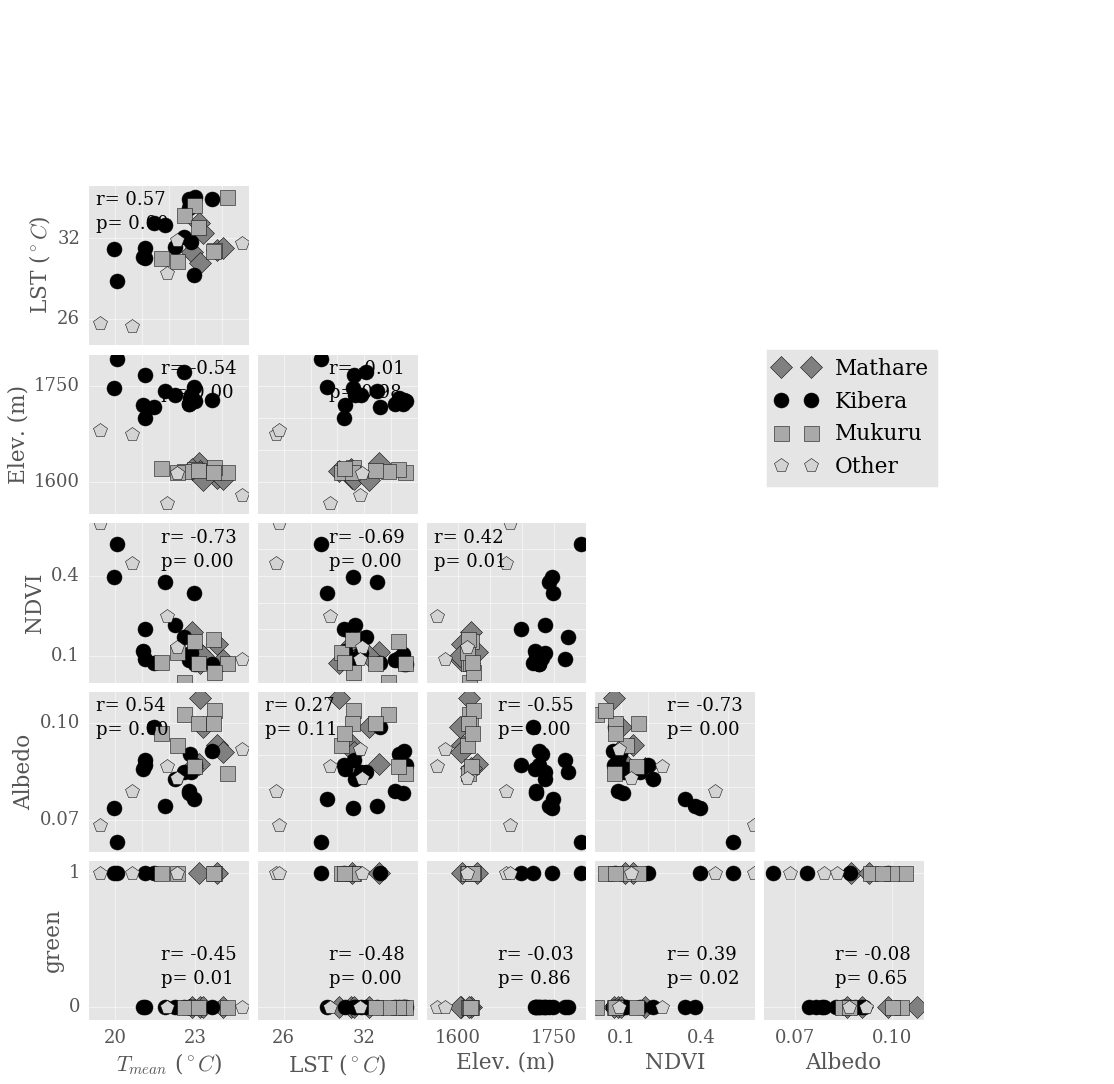

In [303]:
# do scatter matrix with symbols for different neighborhoods

df = pd.read_csv('data/SurfacePropertiesNairobi2015005.csv').set_index(u'Unnamed: 0')
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno
df.drop(['MaxDailyTemp', 'MinDailyTemp'],axis=1, inplace = False).corr()
N = 6
df = df.drop(['MaxDailyTemp', 'MinDailyTemp'] ,axis=1, inplace = False).rename(columns={'MeanDailyTemp': 'Temp'})
df = df[['Temp', 'LST', 'Elevation', 'NDVI', 'albedo', 'InPark']]
fig, axes = plt.subplots(nrows=N, ncols=N, figsize=(18,18))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
names = df.iloc[:,0:N].columns
    
markers = ['D', 'o', 's', 'p']
otherSensors = [18, 27, 34, 41, 42]
neighborhoods = [Mathare, Kibera, Mukuru, otherSensors]
MathareColor ='gray' #'#d7191c'# '#e41a1c'#'#66c2a5'
MukuruColor = 'darkgray'#'#fdae61'#'#ff7f00'#'#fc8d62'
OtherColor = 'lightgray'#'#984ea3'#'#33a02c'
KiberaColor = 'k'#'#abdda4'#'#4daf4a'#'#8da0cb'
colors = [MathareColor, KiberaColor, MukuruColor,OtherColor]
labels = ['Mathare', 'Kibera', 'Mukuru', 'Other']

msize = 15
# plot data
i = 0 
for variable1 in df.iloc[:,:N]: 
    j = 0
    for variable2 in df.iloc[:,:N]: 
        # plots only above the discriminant
        if i > j : 
            for neighborhood, marker, color, label in zip(neighborhoods, markers, colors, labels) : 
                axes[i,j].errorbar(df[variable2][neighborhood], df[variable1][neighborhood],
                                  fmt = marker, markersize = msize, color = color, label = label)
            #axes[i,j].scatter( df[variable2],df[variable1], marker= 'p', s= msize, color = OtherColor, label = 'Other')

            # compute and print stats
            r,p = scipy.stats.pearsonr(df[variable1], df[variable2])
            # Move anotation around according to correlation
            if r > 0 : 
                 xy = (.05, .85)
            else : 
                xy = (.45, .85)
                
            if axes[i,j].is_last_row(): # for the last row, set it in the middle
                xy = (.45, .35)
            axes[i,j].annotate('r= %.2f'%r, xy= xy, xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
            axes[i,j].annotate('p= %.2f'%p, xy=tuple(np.add(xy, (0.0, -0.150))), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')

            ###do axis labels 
            if axes[i,j].is_first_col()== False:
                axes[i,j].yaxis.set_ticklabels([])
            else: 
                axes[i,j].set_yticks(axes[i,j].get_yticks()[1:-1:3]) 
            
            if axes[i,j].is_last_row() == False: 
                 axes[i,j].xaxis.set_ticklabels([])
            else: 
                axes[i,j].set_xticks(axes[i,j].get_xticks()[1:-1:3])
        
        # diagonal plots
#         elif i == j: 
#             axes[i,j].hist(df[variable1])
#             axes[i,j].xaxis.set_ticks_position('top')
#             axes[i,j].yaxis.set_ticks_position('right')
#             axes[i,j].set_yticks(axes[i,j].get_yticks()[1::2])                
#             axes[i,j].set_xticks(axes[i,j].get_xticks()[1::2])
        else: 
            axes[i,j].axis('off')
            
        j = j+1
    i = i+1
    

# set up outside labels
labels = ['$T_{mean}$ ($^\circ C$)', 'LST ($^\circ C$)', 'Elev. (m)', 'NDVI', 'Albedo', 'green']
#for i, label in enumerate(names):
for i,label in enumerate(labels):
    axes[i,0].set_ylabel(label)
    axes[-1,i].set_xlabel(label)
    if i < 5: 
        axes[-1,i].set_ylim(-.1, 1.1) # set range on bottom row, inPark 
        axes[-1,i].set_yticks([0,1])
    else: 
        axes[-1,i].set_xticks([0,1])
    
for ax in axes.flat:
    # Hide all ticks 
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
handles, labels = axes[-1,-2].get_legend_handles_labels() #axes[-1,-2].gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(-1.10, 3.75))
plt.savefig('plots/scattermatrix.eps', bbox_inches='tight')

In [298]:
4.5*0.6

2.6999999999999997

In [183]:
N = tempDF[startdate:enddate].resample('D').mean().index.shape[0]
for neighborhood, name in zip([Mathare, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru']) :
    data = tempDF[startdate:enddate].resample('D').mean()[neighborhood].mean(axis=1) - ((0.86+1.8)/2. + 20)
    print('In %s'%name + ', %i/%i or %2.2f percent days exceed Egondi threshold, mean diff = %2.2f, diff > 4 = %i'%((data>=0).sum(), N,100*(data>=0).sum()/N, data[data>0].mean(), (data>=3).sum()))

In Mathare, 63/80 or 78.00 percent days exceed Egondi threshold, mean diff = 1.90, diff > 4 = 8
In Kibera, 57/80 or 71.00 percent days exceed Egondi threshold, mean diff = 1.29, diff > 4 = 0
In Mukuru, 63/80 or 78.00 percent days exceed Egondi threshold, mean diff = 1.56, diff > 4 = 5


In [194]:
data = tempDF[startdate:enddate].resample('D').mean()[10] - ((0.86+1.8)/2. + 20)
print('At the station' + ', %i/%i or %2.2f percent days exceed Egondi threshold, mean diff = %2.2f, diff > 4 = %i'%((data>=0).sum(), N,100*(data>=0).sum()/N, data[data>0].mean(), (data>=3).sum()))

At the station, 5/80 or 6.00 percent days exceed Egondi threshold, mean diff = 0.32, diff > 4 = 0


In [192]:
(78+78+71)/3.

75.66666666666667

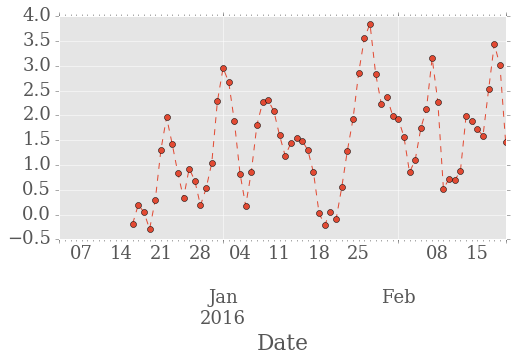

In [187]:
data.plot(style = '--o', figsize = [8,4])

In [ ]:
3500000

In [189]:
pop = 84000/0.04/0.6
pop*.6*0.03

63000.0

In [146]:
(0.86+1.8)/2.

1.33

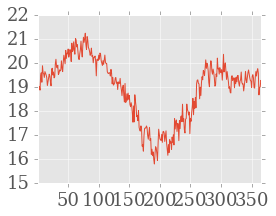

In [140]:
dagoretti.MEAN.groupby(dagoretti.index.dayofyear).mean().plot()

In [129]:
np.percentile(dagoretti['2003-01-01':'2016-01-01'].MEAN.dropna(),75.)

20.100000000000001

In [135]:
np.percentile(dagoretti['2003-01-01':'2016-01-01'].MEAN.dropna(),95.)

21.300000000000001

In [54]:
clim = dagoretti['MIN'].groupby(dagoretti.index.dayofyear).mean()

In [97]:
tempDF[10][startdate:enddate].resample('D').mean().mean() - np.mean([0.86, 1.8]) # mean daily station temp minus calculated mean bias

18.687455729166665

AttributeError: 'module' object has no attribute 'mean'

In [94]:
dagoretti['2015-12-01':]['MIN'].subtract(clim[dagoretti['2015-12-01':].index.dayofyear].values).mean()

NameError: name 'clim' is not defined

In [46]:
# how much hotter are we than the 75th percentile in Egondi et al?
(tempDF.resample('D').mean().mean(axis=1) - (3.2+.16)*.5 - (dag_75_mean[tempDF.resample('D').mean().index.dayofyear])).mean()

4.32164172939008

In [234]:
# at the station...
hot_temp = ( tempDF[startdate:enddate][10].resample('D').min()-(0.16+ smoothed_dag_95_min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]))
print('Percent of days where station exceeds min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate][10].resample('D').max()- (3.2+ smoothed_dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]))
print('Percent of days where station exceeds max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0]))

('Percent of days where station exceeds min threshold: ', 1.0)
('Total days where station exceeds min threshold', 80)
('Total days : ', 80)
('Percent of days where station exceeds max threshold: ', 0.95)
('Total days where station exceeds max threshold', 76)
('Total days : ', 80)


In [250]:
(hot_temp> 0).sum()

80

In [241]:
# in the neighborhoods...
hot_temp = ( tempDF[startdate:enddate].resample('D').min()[10]+0.16- smoothed_dag_95_min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate].resample('D').max()[10]+ 3.2- smoothed_dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

('Percent of days where station exceeds min threshold: ', 1.0)
('Total days where station exceeds min threshold', 80)
('Total days : ', 80)
('Percent of days where station exceeds max threshold: ', 1.0)
('Total days where station exceeds max threshold', 80)
('Total days : ', 80)


In [58]:
#calculate the difference between tmax at station and 95th tmax percentile
d = (3.2+ smoothed_dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])- tempDF[startdate:enddate][10].resample('D').max()
d[d>=0]

Date
2016-01-04    2.185815
2016-01-21    0.220742
Name: 10, dtype: float64

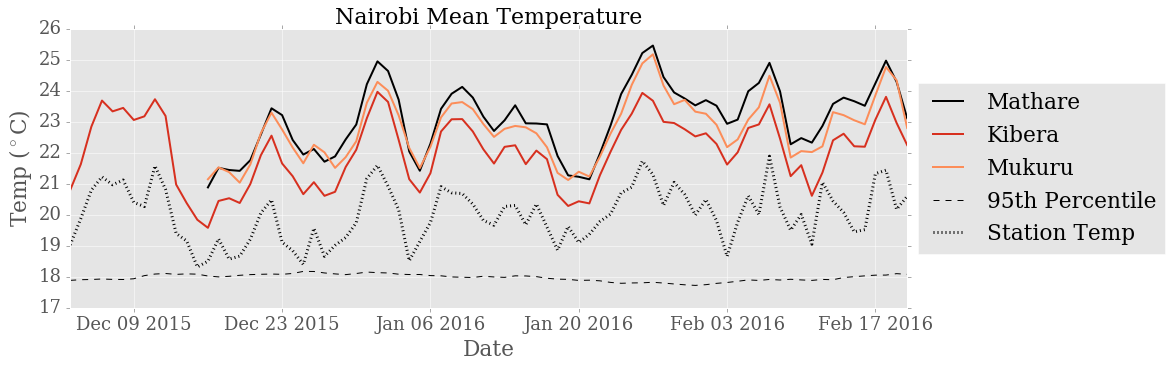

In [120]:
fig = plt.figure(figsize = [15, 5])
plt.hold(True)
color_wheel = ['black', '#d7301f', '#fc8d59']

for neighborhood, labels, color in zip([MathareCleaned, Kibera, Mukuru], ['Mathare', 'Kibera', 'Mukuru'], color_wheel):
    plt.plot(tempDF[startdate:enddate].resample('D').min().index,
             tempDF[startdate:enddate].resample('D').mean()[neighborhood].mean(axis=1), 
            label = labels, alpha =1, linewidth = 2, color= color)

plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
         smoothed_dag_95_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear],
         '--k', label = '95th Percentile')
         
plt.plot(tempDF[startdate:enddate].resample('D').max().index, 
        tempDF[startdate:enddate][10].resample('D').mean(),
        ':', label = 'Station Temp', color = 'k', linewidth = 3)

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Nairobi Mean Temperature')
plt.ylabel('Temp ($^\circ$C)')
plt.xlabel('Date')

In [232]:
hot_temp = ( tempDF[startdate:enddate].resample('D').mean()[10]- dag_95_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds mean threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds mean threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0]))

hot_temp = ( tempDF[startdate:enddate].resample('D').min()[10]- dag_95_min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate].resample('D').max()[10]- dag_95_max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

('Percent of days where station exceeds mean threshold: ', 1.0)
('Total days where station exceeds mean threshold', 80)
('Total days : ', 80)
('Percent of days where station exceeds min threshold: ', 1.0)
('Total days where station exceeds min threshold', 80)
('Total days : ', 80)
('Percent of days where station exceeds max threshold: ', 0.9875)
('Total days where station exceeds max threshold', 79)
('Total days : ', 80)


In [452]:
# there's no point doing this analysis if all the days are hot. 

hot_temp = ( tempDF[startdate:enddate].resample('D').mean()[10]- dag_95_mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
selected = hot_temp[hot_temp>0].index
not_hot_selected = hot_temp[hot_temp<0].index

# diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').mean().subtract(tempDF[10][startdate:enddate].resample('D').mean().values
# ,  axis=0)
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').mean().subtract(tempDF[10][startdate:enddate].resample('D').mean(),axis=0)

from scipy import stats
stats.ttest_ind(diff.loc[selected].dropna().values.flatten(), 
                diff.loc[not_hot_selected].dropna().values.flatten(), equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [551]:
hot_temp = ( tempDF[startdate:enddate].resample('D').mean()[10]- p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds mean threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds mean threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate].resample('D').min()[10]- p95min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = ( tempDF[startdate:enddate].resample('D').max()[10]- p95max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
print('Percent of days where station exceeds max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days where station exceeds max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

('Percent of days where station exceeds mean threshold: ', 0.0875)
('Total days where station exceeds mean threshold', 7)
('Total days : ', 80)
('Percent of days where station exceeds min threshold: ', 0.3375)
('Total days where station exceeds min threshold', 27)
('Total days : ', 80)
('Percent of days where station exceeds max threshold: ', 0.0875)
('Total days where station exceeds max threshold', 7)
('Total days : ', 80)


In [346]:
# If we increase the 95th percentile by 2 degrees to account for differences, 
hot_temp = ( tempDF[startdate:enddate].resample('D').mean().mean(axis=1)- (p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]+2))
print('Percent of days exceeding mean threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days exceeding mean threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = tempDF[startdate:enddate].resample('D').min().mean(axis=1) - (p95min[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]+2)
print('Percent of days exceeding min threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days exceeding min threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

hot_temp = tempDF[startdate:enddate].resample('D').max().mean(axis=1) - (p95max[tempDF[startdate:enddate].resample('D').mean().index.dayofyear]+2)
print('Percent of days exceeding max threshold: ',float((hot_temp > 0).sum())/float(hot_temp.shape[0])) 
print('Total days exceeding max threshold',  (hot_temp > 0).sum())
print('Total days : ',int(hot_temp.shape[0])) 

('Percent of days exceeding mean threshold: ', 0.125)
('Total days exceeding mean threshold', 10)
('Total days : ', 80)
('Percent of days exceeding min threshold: ', 0.275)
('Total days exceeding min threshold', 22)
('Total days : ', 80)
('Percent of days exceeding max threshold: ', 0.1875)
('Total days exceeding max threshold', 15)
('Total days : ', 80)


In [348]:
hot_temp = ( tempDF[startdate:enddate].resample('D').mean().mean(axis=1)- p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
selected = hot_temp[hot_temp>0].index
not_hot_selected = hot_temp[hot_temp<0].index

# diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').mean().subtract(tempDF[10][startdate:enddate].resample('D').mean().values
# ,  axis=0)
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].subtract(tempDF[10][startdate:enddate]
,  axis=0).resample('D').mean()

from scipy import stats
stats.ttest_ind(diff.loc[selected].dropna().values.flatten(), 
                diff.loc[not_hot_selected].dropna().values.flatten(), equal_var = False)

Ttest_indResult(statistic=3.8496786355234791, pvalue=0.00012158665613398362)

In [349]:
hot_temp = ( tempDF[startdate:enddate].resample('D').mean().mean(axis=1)- p95mean[tempDF[startdate:enddate].resample('D').mean().index.dayofyear])
selected = hot_temp[hot_temp>0].index
not_hot_selected = hot_temp[hot_temp<0].index

# diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').mean().subtract(tempDF[10][startdate:enddate].resample('D').mean().values
# ,  axis=0)
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].subtract(tempDF[10][startdate:enddate]
,  axis=0).resample('D').mean()

from scipy import stats
stats.ttest_ind(diff.loc[selected].dropna().values.flatten(), 
                diff.loc[not_hot_selected].dropna().values.flatten(), equal_var = False)

Ttest_indResult(statistic=6.5768922403382151, pvalue=6.0995353184140959e-11)

In [349]:
print('On hot days, mean daily station difference is : ', 
      diff.loc[selected].dropna().values.mean())
print('For other days, mean daily station difference is : ', 
      diff.loc[not_hot_selected].dropna().values.mean())

('On hot days, mean daily station difference is : ', 2.3604509027777776)
('For other days, mean daily station difference is : ', 2.1190491092777322)


In [19]:
hot_days = ((tempDF[10].resample('D').max() > smoothed_dag_95_max[tempDF[10].resample('D').max().index.dayofyear])).index
not_hot_days = ((tempDF[10].resample('D').max() < smoothed_dag_95_max[tempDF[10].resample('D').max().index.dayofyear])).index

In [43]:
# max 
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').max().subtract(tempDF[10][startdate:enddate].resample('D').max().values
,  axis=0)

hot_days = ((tempDF[10].resample('D').max() > smoothed_dag_95_max[tempDF[10].resample('D').max().index.dayofyear])).index
not_hot_days = ((tempDF[10].resample('D').max() < smoothed_dag_95_max[tempDF[10].resample('D').max().index.dayofyear])).index
hot_days = (tempDF[10].resample('D').max()- smoothed_dag_95_max[tempDF[10].resample('D').max().index.dayofyear])> 0
not_hot_days = (tempDF[10].resample('D').max()- smoothed_dag_95_max[tempDF[10].resample('D').max().index.dayofyear])< 0
diff.loc[hot_days].mean().mean(), diff.loc[not_hot_days].mean().mean()

(3.032037159258651, nan)

In [45]:
# min 
diff = tempDF.drop(10, axis=1, inplace = False)[startdate:enddate].resample('D').min().subtract(tempDF[10][startdate:enddate].resample('D').min().values
,  axis=0)

hot_days = ((tempDF[10].resample('D').min() > smoothed_dag_95_min[tempDF[10].resample('D').min().index.dayofyear])).index
not_hot_days = ((tempDF[10].resample('D').min() < smoothed_dag_95_min[tempDF[10].resample('D').min().index.dayofyear])).index
hot_days = (tempDF[10].resample('D').min()- smoothed_dag_95_min[tempDF[10].resample('D').min().index.dayofyear])> 0
not_hot_days = (tempDF[10].resample('D').min()- smoothed_dag_95_min[tempDF[10].resample('D').min().index.dayofyear])< 0
diff.loc[hot_days].mean().mean(), diff.loc[not_hot_days].mean().mean()

(2.2056020325569947, nan)

In [302]:
# now explain it : relate these changes to surface properties such as satellite-derived albedo and NDVI for min, max, mean

#first, calculate surface properties. These are now saved out as SurfacePropertiesNairobi.csv
# import spatialfunctions
# lon = meta['location:Longitude'].values
# lat = meta['location:Latitude'].values

# rasterfile = 'data/LC81680612015053LGN00_B10.TIF'#'../satellite/data/atm_cor_10_LC80150332015229.tif'
# band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
# LST = spatialfunctions.band10_toLST(band10)

# #path = '../../satellite/data/BaltimoreLandsatSummer2015/L8 OLI_TIRS/LC80150332015229LGN00/'
# path = '../satellite/data/Nairobi/L8OLI_TIRS/LC81680612015053LGN00/'
# B = np.zeros((5,lon.shape[0]))
# for i in (1,2,3,4,5): 
#     file = path+ 'LC81680612015053LGN00_B'+'%s'%i +'.TIF'
#     DN = spatialfunctions.extract_raster_values(lon,lat,file)
#     # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
#     reflectance_mult_band = 2.000e-5
#     reflectance_add_band  = -0.100000
#     B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

# alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
# alb[alb>1] = 'NaN'
# alb[alb<0] = 'NaN'

# NDVI = (B[4,:]-B[3,:]) / (B[4,:]+B[3,:])

# rasterfile = 'data/s02_e036_1arc_v3.tif'
# elevation = spatialfunctions.extract_raster_values(lon,lat, rasterfile)

# df = pd.DataFrame({"MaxDailyTemp": tempDF.resample('D').max().mean(),
#                    'MinDailyTemp': tempDF.resample('D').min().mean(), 
#                    'MeanDailyTemp': tempDF.resample('D').mean().mean(), # tempDF.resample('D').min(),
#                    "Elevation": elevation, 
#                    "LST": LST, 
#                     "NDVI": NDVI,
#                    "albedo": alb, 
#                     }).set_index(tempDF.columns)
# df.to_csv('SurfacePropertiesNairobi.csv')

df = pd.read_csv('data/SurfacePropertiesNairobi2015005.csv').set_index(u'Unnamed: 0')
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno
df.drop(['MaxDailyTemp', 'MinDailyTemp'],axis=1, inplace = False).corr()

,Elevation,LST,MeanDailyTemp,NDVI,albedo,InPark
Elevation,1.000000,-0.005188,-0.540627,0.420329,-0.552861,-0.030453
LST,-0.005188,1.000000,0.565691,-0.687541,0.271120,-0.483513
MeanDailyTemp,-0.540627,0.565691,1.000000,-0.730518,0.540112,-0.447187
NDVI,0.420329,-0.687541,-0.730518,1.000000,-0.729262,0.391011
albedo,-0.552861,0.271120,0.540112,-0.729262,1.000000,-0.077320
InPark,-0.030453,-0.483513,-0.447187,0.391011,-0.077320,1.000000


In [ ]:
import statsmodels.formula.api as sm
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno

result = sm.ols(formula="MeanDailyTemp ~ Elevation+ albedo + NDVI + C(InPark)+ LST", data=df).fit()
print result.params
print result.summary()

In [273]:
import statsmodels.formula.api as sm
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno
result = sm.ols(formula="MeanDailyTemp ~ Elevation+ albedo + NDVI +  LST", data=df).fit()
print result.params
print result.summary()

Intercept    30.844260
Elevation    -0.007793
albedo       -5.169153
NDVI         -3.145832
LST           0.177807
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          MeanDailyTemp   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     14.31
Date:                Mon, 27 Mar 2017   Prob (F-statistic):           1.00e-06
Time:                        22:52:52   Log-Likelihood:                -40.896
No. Observations:                  36   AIC:                             91.79
Df Residuals:                      31   BIC:                             99.71
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-

In [128]:
# note that elevation is pretty co-linear with NDVI, albedo
import statsmodels.formula.api as sm
inPark = {'grass': 1, 'impervious': 0, 'soil':1, 'grass impervious':0, 'grass impervious dirt': 0 }
parkyesno = np.array([inPark[x] for x in meta.landcoverclass])
df['InPark'] = parkyesno

result = sm.ols(formula="MeanDailyTemp ~ Elevation+ albedo+ NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         35.799332
C(InPark)[T.1]    -0.676660
Elevation         -0.006960
albedo            -7.781098
NDVI              -4.452424
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          MeanDailyTemp   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     15.04
Date:                Mon, 13 Mar 2017   Prob (F-statistic):           6.16e-07
Time:                        13:23:51   Log-Likelihood:                -40.312
No. Observations:                  36   AIC:                             90.62
Df Residuals:                      31   BIC:                             98.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>

In [68]:
result = sm.ols(formula="MinDailyTemp ~ LST + albedo + NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         15.917405
C(InPark)[T.1]    -0.377356
LST                0.124439
albedo             4.956106
NDVI              -3.050439
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           MinDailyTemp   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.165
Date:                Fri, 05 Aug 2016   Prob (F-statistic):             0.0289
Time:                        17:37:19   Log-Likelihood:                -40.913
No. Observations:                  33   AIC:                             91.83
Df Residuals:                      28   BIC:                             99.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>

In [69]:
result = sm.ols(formula="MaxDailyTemp ~ LST + albedo + NDVI + C(InPark)", data=df).fit()
print result.params
print result.summary()

Intercept         23.370794
C(InPark)[T.1]    -0.758499
LST                0.462599
albedo            27.041957
NDVI             -14.290242
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           MaxDailyTemp   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     8.436
Date:                Fri, 05 Aug 2016   Prob (F-statistic):           0.000135
Time:                        17:37:24   Log-Likelihood:                -67.337
No. Observations:                  33   AIC:                             144.7
Df Residuals:                      28   BIC:                             152.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>

In [92]:
result = sm.ols(formula="MeanDailyTemp ~ elevation +NDVI", data=df).fit()
print result.params
print result.summary()

Intercept    32.950085
elevation    -0.005555
NDVI         -8.056793
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          MeanDailyTemp   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     10.34
Date:                Fri, 05 Aug 2016   Prob (F-statistic):           0.000384
Time:                        18:15:10   Log-Likelihood:                -45.701
No. Observations:                  33   AIC:                             97.40
Df Residuals:                      30   BIC:                             101.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------